In [1]:
# Jason Vo
# 11/5/2023
# DATA320
# Assignment: Practical Dashboards

# Modules used in this assignment
import json 
import pymongo
import certifi
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Store our connection string filepath as a variable for better readability
connection_string_filepath = 'D:\\Users\\Wakibara\\Documents\\school\\Older quarters\\2023\\Fall 2023\\DATA320 - Data Acquisition & Management\\vo-secrets.json'


with open(connection_string_filepath) as f:
    data = json.load(f)
    secret_key = data['vo-secrets']

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Users\\Wakibara\\Documents\\school\\Fall 2023\\DATA320 - Data Acquisition & Management\\vo-secrets.json'

In [ ]:
# Connect to a MongoDB Server
mongo_connection_string = data['vo-secrets']
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

# Fetch the database named "DATA320"
db = client['DATA320']
allCollections = db.list_collection_names()

# List MongoDB version info and visible collections
print(f"This database has the collections {allCollections}")

This database has the collections ['IMDB', 'Metacritic_Movies', 'IMDB_Pipeline']


In [ ]:
# Access our aggregation pipeline and output the head for confirmation
cursor = db.IMDB_Pipeline.find()
imdb_view = pd.DataFrame(cursor)
imdb_view.head()

,_id,id,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,genres_split,cast_split,director_split,producer_split,company_split,release_date,mpaa_Array,first_mpaa_rating
0,652df87752b28dcef93ed4b6,77416,The Deer Hunter,183.0,8,334827,15000000.0,NaN,NaN,"[Drama, War]","[Robert De Niro, John Cazale, John Savage, Chr...",[Michael Cimino],"[Joann Carelli, Michael Cimino, Michael Deeley...","[EMI Films, Universal Pictures]",1978-12-08,[R],R
1,652df87752b28dcef93ed4b7,77651,Halloween,91.0,7,267109,300000.0,NaN,70000000.0,"[Horror, Thriller]","[Donald Pleasence, Jamie Lee Curtis, Nancy Kye...",[John Carpenter],"[Moustapha Akkad, John Carpenter, Debra Hill, ...","[Compass International Pictures, Falcon Intern...",1978-10-25,[TV-14],TV-14
2,652df87752b28dcef93ed4bb,77713,I Spit on Your Grave,101.0,5,28381,650000.0,NaN,NaN,"[Horror, Thriller]","[Camille Keaton, Eron Tabor, Richard Pace, Ant...",[Meir Zarchi],"[Meir Zarchi, Joseph Zbeda]",[Barquel Creations],1978-05-23,[TV-MA],TV-MA
3,652df87752b28dcef93ed4bc,77745,Invasion of the Body Snatchers,115.0,7,59436,3500000.0,1298129.0,NaN,"[Horror, Sci-Fi]","[Donald Sutherland, Brooke Adams, Jeff Goldblu...",[Philip Kaufman],[Robert H. Solo],[Solofilm],1978-12-21,[TV-MA],TV-MA
4,652df87752b28dcef93ed4c4,77269,The Boys from Brazil,125.0,7,27910,12000000.0,NaN,NaN,"[Drama, Mystery, Sci-Fi, Thriller]","[Gregory Peck, Laurence Olivier, James Mason, ...",[Franklin J. Schaffner],"[Robert Fryer, Stanley O'Toole, Martin Richards]","[Sir Lew Grade, Producers Circle, ITC Films]",1978-08-19,[R],R


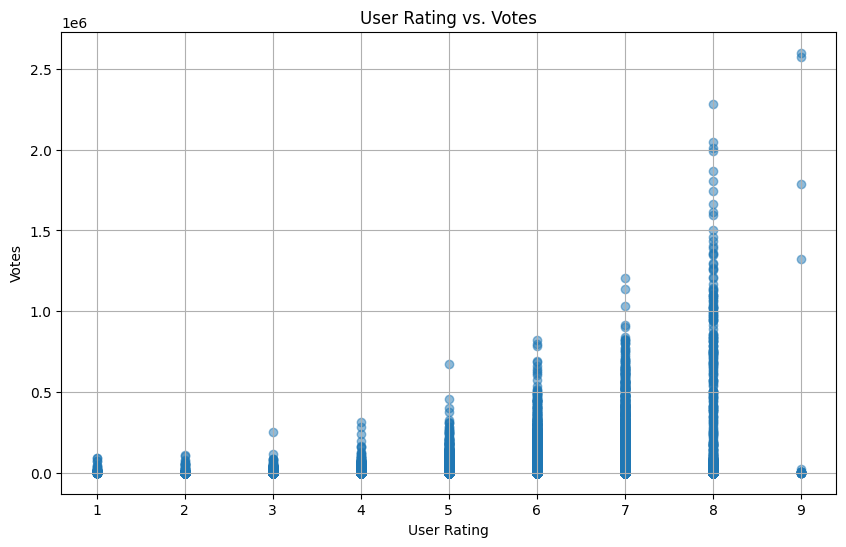

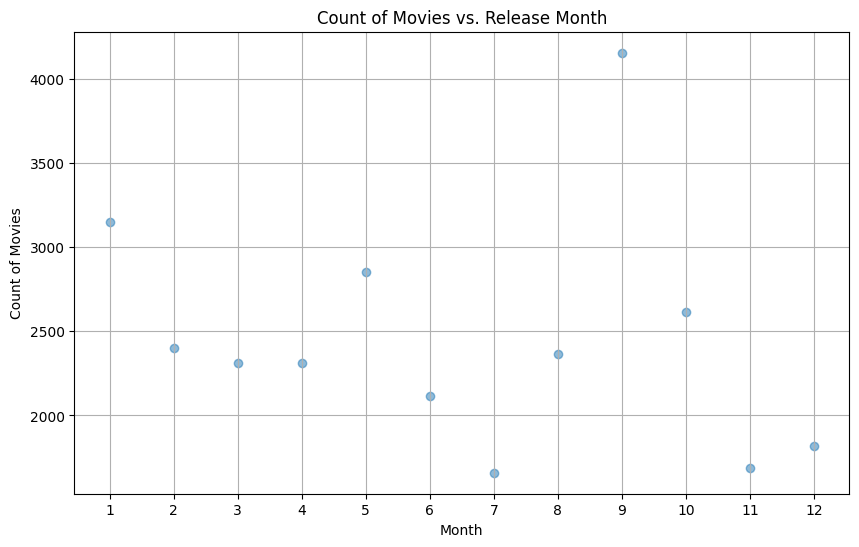

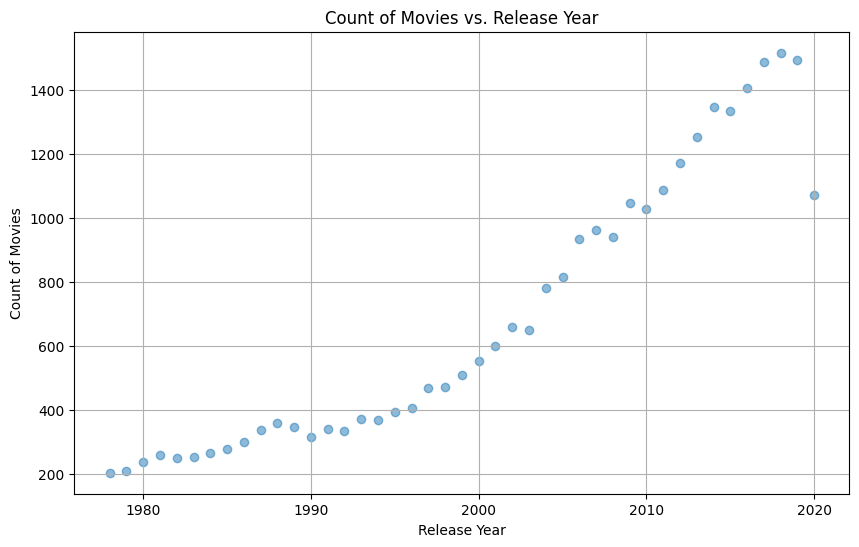

In [ ]:
# Scatterplot: User Rating vs. Vote Count

# Scatterplot details
plt.figure(figsize=(10, 6))
plt.scatter(imdb_view["user_rating"], imdb_view["votes"], alpha=0.5)
plt.title("User Rating vs. Votes")
plt.xlabel("User Rating")
plt.ylabel("Votes")
plt.grid(True)
plt.show()

# Scatterplot: Count of movies vs. Release Month

imdb_view['release_date'] = pd.to_datetime(imdb_view['release_date'])  # Set up release_date so that we can...
imdb_view['release_month'] = imdb_view['release_date'].dt.month  # Extract the month from it

# Count the number of movies released in each month
month_counts = imdb_view['release_month'].value_counts().sort_index()

# Scatterplot details
plt.figure(figsize=(10, 6))
plt.scatter(month_counts.index, month_counts.values, alpha=0.5)
plt.title("Count of Movies vs. Release Month")
plt.xlabel("Month")
plt.ylabel("Count of Movies")
plt.xticks(range(1, 13)) 
plt.grid(True)
plt.show()

# Scatterplot: Release Year vs. Count of Movies

imdb_view['release_date'] = pd.to_datetime(imdb_view['release_date'])  # Set up release_date so that we can...
imdb_view['release_year'] = imdb_view['release_date'].dt.year  # Extract the year from it

# Count the number of movies released in each year
year_counts = imdb_view['release_year'].value_counts().sort_index()

# Scatterplot details
plt.figure(figsize=(10, 6))
plt.scatter(year_counts.index, year_counts.values, alpha=0.5)
plt.title("Count of Movies vs. Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count of Movies")
plt.grid(True)
plt.show()





# What I learned from these three charts.

# User Rating vs. Votes:
The center of the "bell curve" for user ratings vs. votes seems to be about the 5-8 score range, which receives the most votes. Outside of this center, the vote count drops dramatically, with the top of the rating system (9) having a couple odd outliers and a much wider spread. This suggests that the majority of movies receive a score of 5-8, meaning the films meet average or above-average quality. Users also tend to only vote if they find the movie to meet these average to above-average expectations. Considering both wider spread and outliers for films at a 9 score, this indicates that films that do achieve this rating do so via near-unanimous agreement from users. Contrastingly - movies that perform below average (under a 5) receive very little votes, meaning that if a film performs poorly users are less likely to vote on them. Overall, the better the movie does the more votes it receives. 
If it does overwhelmingly positively, it can reach the "highs" in terms of number of votes.

#  Count of movies vs. Release Month

The obvious winner is September, followed by January. My assumption for the large count of movies releasing in September would be due to publicity from film festivals (most notably, Venice International Film Festival and Toronto International Film Festival). Both of these film festivals take place in September, so releasing a movie during September prior to these film festivals is likely to acquire nominiations for additional publicity. If a film got a nomination, it could be used to market their movie -- "This movie got a nomination during its opening weekend... must be good!" 
Looking at January and May, the next highest movie counts, these are less obvious to me. 
January - release date aligns with winter holidays (somewhat), a time where people are more likely to want to be indoors to watch movies. 
May - prior to Summer where many younger audiences have summer break. Movies released here could be targeting those younger audiences newly acquired free time for better returns.
Overall - movies are generally released at points in time during the year where they can either receive additional exposure or targeting periods of time where people are more likely to have leisure time. Both have intent to looking for more audience / market share. 

# Count of Movies vs. Release Year

This is similar to the previous scatter plot but more generalized, making it easier to make a statement about the general trend. 
Generally, the amount of movies increases as time goes on. The graph shows an obvious upwards trend, with the only major outlier being the year 2020. 
Reasons for 2020 outlier: This is likely due to COVID lockdown. Numerous films were delayed during COVID due to production issues and movie theaters took time to implement COVID procedures into their movie theaters. As a result, movies were either delayed to later years for their theater runs or were released online. 
If this graph showed more, I would expect to see the movie count reach 1500-1600+ movie count for the later years, if not more, to account for the low amount of releases in 2020.




# My MongoDB Aggregation Pipeline

```
[
    {
        '$project': {
            'id': '$id', 
            'title': '$title', 
            'runtime': {
                '$convert': {
                    'input': '$runtime', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'user_rating': {
                '$convert': {
                    'input': '$user_rating', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'votes': {
                '$convert': {
                    'input': '$votes', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'budget': {
                '$convert': {
                    'input': '$budget', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'opening_weekend': {
                '$convert': {
                    'input': '$opening_weekend', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'gross_sales': {
                '$convert': {
                    'input': '$gross_sales', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'genres_split': {
                '$split': [
                    {
                        '$toString': '$genres'
                    }, ', '
                ]
            }, 
            'cast_split': {
                '$split': [
                    {
                        '$toString': '$cast'
                    }, ', '
                ]
            }, 
            'director_split': {
                '$split': [
                    {
                        '$toString': '$director'
                    }, ', '
                ]
            }, 
            'producer_split': {
                '$split': [
                    {
                        '$toString': '$producer'
                    }, ', '
                ]
            }, 
            'company_split': {
                '$split': [
                    {
                        '$toString': '$company'
                    }, ', '
                ]
            }, 
            'release_date': {
                '$convert': {
                    'input': '$release_date', 
                    'to': 'date', 
                    'onError': None
                }
            }, 
            'mpaa_Array': {
                '$map': {
                    'input': {
                        '$split': [
                            '$mpaa_rating', '::'
                        ]
                    }, 
                    'as': 'mpaa_split', 
                    'in': {
                        '$trim': {
                            'input': '$$mpaa_split'
                        }
                    }
                }
            }
        }
    }, {
        '$addFields': {
            'first_mpaa_rating': {
                '$arrayElemAt': [
                    '$mpaa_Array', 0
                ]
            }
        }
    }
]
```
